In [ ]:
#from google.colab import files


#uploaded = files.upload()

In [ ]:
#from google.colab import files
#
#import io

#df = pd.read_csv(io.BytesIO(uploaded['FuelConsumptionCo2 (2).csv']))


In [ ]:
#df.head()

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
path="/content/drive/MyDrive/Kiran/AI JAN 22/Scikit  Learn/Regression for Co2 Prediction/FuelConsumptionCo2.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv(path)

In [ ]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
#EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [ ]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [ ]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
df.shape

(1067, 13)

In [ ]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


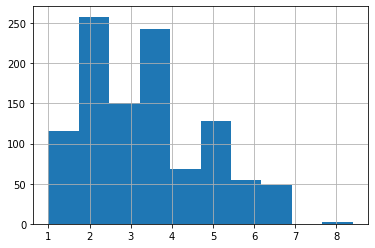

In [ ]:
df["ENGINESIZE"].hist()

In [ ]:
# Realation Co2 Emission and Engine Size

In [ ]:
df["ENGINESIZE"].corr(df["CO2EMISSIONS"])

0.8741543683958118

Text(0, 0.5, 'CO2EMISSIONS')

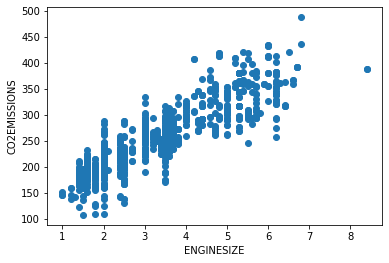

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df["ENGINESIZE"],df["CO2EMISSIONS"])
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")

In [ ]:
df["MODELYEAR"].corr(df["CO2EMISSIONS"])

nan

In [ ]:
df["CYLINDERS"].corr(df["CO2EMISSIONS"])

0.8496845920141154

Text(0, 0.5, 'CO2EMISSIONS')

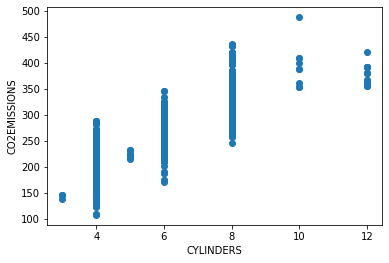

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df["CYLINDERS"],df["CO2EMISSIONS"])
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")

In [ ]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df2=df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ENGINESIZE            1067 non-null   float64
 1   CYLINDERS             1067 non-null   int64  
 2   FUELCONSUMPTION_CITY  1067 non-null   float64
 3   FUELCONSUMPTION_COMB  1067 non-null   float64
 4   CO2EMISSIONS          1067 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 41.8 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb46a2e5f90>,
      dtype=object)

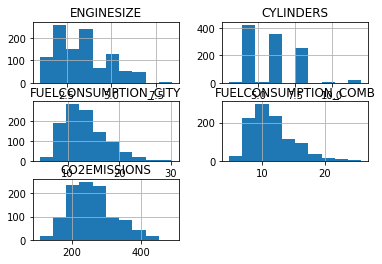

In [ ]:
df2.hist()

In [ ]:
df2

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,8.5,196
1,2.4,4,11.2,9.6,221
2,1.5,4,6.0,5.9,136
3,3.5,6,12.7,11.1,255
4,3.5,6,12.1,10.6,244
...,...,...,...,...,...
1062,3.0,6,13.4,11.8,271
1063,3.2,6,13.2,11.5,264
1064,3.0,6,13.4,11.8,271
1065,3.2,6,12.9,11.3,260


In [ ]:
df2.shape

(1067, 5)

In [ ]:
import numpy as np

In [ ]:
msk=np.random.rand(len(df2))<0.8

In [ ]:
train_df=df2[msk]
test_df=df2[~msk]

In [ ]:
train_df.head()


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,8.5,196
1,2.4,4,11.2,9.6,221
2,1.5,4,6.0,5.9,136
3,3.5,6,12.7,11.1,255
4,3.5,6,12.1,10.6,244


In [ ]:
train_df.shape


(866, 5)

In [ ]:
test_df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB,CO2EMISSIONS
12,5.9,12,18.0,15.6,359
22,2.0,4,11.5,10.0,230
31,4.0,8,13.5,11.3,260
51,5.2,10,21.1,17.8,409
72,4.0,8,16.7,14.0,322


In [ ]:
test_df.shape

(201, 5)

In [ ]:
# Simple Linear Regression
# Co2 Emission wrt ENGINESIZE

In [ ]:
X_train_df=train_df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_COMB"]]

In [ ]:
X_train_df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB
0,2.0,4,9.9,8.5
1,2.4,4,11.2,9.6
2,1.5,4,6.0,5.9
3,3.5,6,12.7,11.1
4,3.5,6,12.1,10.6
...,...,...,...,...
1061,3.2,6,13.0,11.2
1062,3.0,6,13.4,11.8
1063,3.2,6,13.2,11.5
1065,3.2,6,12.9,11.3


In [ ]:
Y_train_df=train_df[["CO2EMISSIONS"]]

In [ ]:
Y_train_df

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244
...,...
1061,258
1062,271
1063,264
1065,260


In [ ]:
X_test_df=test_df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_COMB"]]
Y_test_df=test_df[["CO2EMISSIONS"]]

In [ ]:
X_test_df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB
12,5.9,12,18.0,15.6
22,2.0,4,11.5,10.0
31,4.0,8,13.5,11.3
51,5.2,10,21.1,17.8
72,4.0,8,16.7,14.0
...,...,...,...,...
1050,3.6,6,14.2,12.1
1052,2.0,4,13.6,11.6
1056,2.5,5,11.3,9.7
1060,3.0,6,13.2,11.5


In [ ]:
Y_test_df.head()

,CO2EMISSIONS
12,359
22,230
31,260
51,409
72,322


In [ ]:
print("\n Training Data:")
print("\n X_train_df.shape:",X_train_df.shape)
print("\n Y_train_df.shape:",Y_train_df.shape)


 Training Data:

 X_train_df.shape: (866, 4)

 Y_train_df.shape: (866, 1)


In [ ]:
print("\n Test Data:")
print("\n X_test_df.shape:",X_test_df.shape)
print("\n Y_test_df.shape:",Y_test_df.shape)


 Test Data:

 X_test_df.shape: (201, 4)

 Y_test_df.shape: (201, 1)


In [ ]:
#Convert features to an array
import numpy as np


In [ ]:
X_train_df=np.asarray(X_train_df)
Y_train_df=np.asarray(Y_train_df)

X_test_df=np.asarray(X_test_df)
Y_test_df=np.asarray(Y_test_df)

In [ ]:
X_train_df

array([[ 2. ,  4. ,  9.9,  8.5],
       [ 2.4,  4. , 11.2,  9.6],
       [ 1.5,  4. ,  6. ,  5.9],
       ...,
       [ 3.2,  6. , 13.2, 11.5],
       [ 3.2,  6. , 12.9, 11.3],
       [ 3.2,  6. , 14.9, 12.8]])

In [ ]:
#ML model Creation
from sklearn import linear_model

In [ ]:
model=linear_model.LinearRegression()

In [ ]:
#training Process

In [ ]:
model.fit(X_train_df,Y_train_df)

LinearRegression()

In [ ]:
model.coef_

array([[11.09456107,  6.51690597,  4.82620401,  4.31068431]])

In [ ]:
model.intercept_

array([67.30191148])

In [ ]:
# Y=C+m*X
#Co2 Emission=125.19+38.94* EngineSize

In [ ]:
Y_Predict_df=model.predict(X_test_df)

In [ ]:
X_test_df[0:2]

array([[ 5.9, 12. , 18. , 15.6],
       [ 2. ,  4. , 11.5, 10. ]])

In [ ]:
Y_Predict_df[0:2]

array([[365.08104089],
       [214.16684675]])

In [ ]:
Y_test_df[0:2]

array([[359],
       [230]])

In [ ]:
# Analayze the Accuracy

In [ ]:
Y_test_df-Y_Predict_df

array([[ -6.08104089],
       [ 15.83315325],
       [-17.67989039],
       [ 40.27422587],
       [ 17.23740913],
       [ -7.03044583],
       [ -0.71996036],
       [ -9.34091431],
       [ -3.39197887],
       [-13.13777137],
       [-28.8667872 ],
       [ 22.88638327],
       [ 13.16113474],
       [ 17.37945163],
       [ 15.81637747],
       [ -3.25413273],
       [  1.96436831],
       [-47.09841613],
       [-12.6756518 ],
       [ 14.26422168],
       [  2.51591178],
       [ -7.15718947],
       [  4.60265112],
       [  7.38082732],
       [-53.52300427],
       [  3.68912944],
       [-10.89874337],
       [-44.62209712],
       [ -9.01264656],
       [-17.04789317],
       [-43.18423989],
       [ 32.35011433],
       [-41.2990807 ],
       [ 40.86798133],
       [-35.76275986],
       [ 19.43057542],
       [-48.74471216],
       [ 13.04332081],
       [ -3.30585186],
       [  2.52201322],
       [ -9.93350257],
       [  8.98222681],
       [-56.63522437],
       [  9

In [ ]:
#MAE
x=np.mean(np.abs(Y_test_df-Y_Predict_df))
x

17.37820864032553

In [ ]:
#MSE
p=np.mean((Y_test_df-Y_Predict_df)*(Y_test_df-Y_Predict_df))

In [ ]:
p

546.9473983836027

In [ ]:
#RMSE
q=np.sqrt(p)

In [ ]:
q

23.38690655866232

In [ ]:
# Multiple Lineaar Regression